In [47]:
import random
import time

import numpy
import numpy as np
rng = np.random.default_rng()
import math
import sys
from numpy import linalg as LA
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Unimodel benchmark functions.

In [16]:
def F1(X):
    output = sum(np.square(X))
    return output

def F2(X):
    output = np.sum(np.abs(X))+np.prod(np.abs(X))
    return output

def F3(X):
    output = sum(np.square(X[j]) for i in range(len(X)) for j in range(i+1))
    return output

def F4(X):
    output = max(np.abs(X))
    return output

def F5(X):
    output = sum(100*np.square(X[i+1]-np.square(X[i])) + np.square(X[i]-1) for i in range(len(X)-1))
    return output

def F6(X):
    output = sum(np.square(abs(i+0.5)) for i in X)
    return output

def F7(X):
    output = sum((i+1)*pow(X[i],4) for i in range(len(X))) + random.random()
    return output

Multi-model benchmark functions

In [17]:
def F8(X):
    output = sum(-(X*np.sin(np.sqrt(np.abs(X)))))
    return output

def F9(X):
    output = 10*len(X) + sum(pow(X[i],len(X))-10*np.cos(2*np.pi*X[i]) for i in range(len(X)))
    return output

def F10(X):
    output = -20*np.exp(-0.2*np.sqrt(1/len(X)*sum(np.square(X)))) - np.exp(1/len(X)*sum(np.cos(2*np.pi*X[i]) for i in range(len(X)))) + 20 + np.exp(1)
    return output

def F11(X):
    output =1/4000*sum(np.square(X)) - np.prod([np.cos(a/(b+1)**(1/2)) for a,b in zip(X, list(range(len(X))))]) +1
    return output

def F12(X):  #TODO 怪怪的
    a=10
    k=100
    m=4
    pt1=0
    for i in X:
        if i>a:
            pt1+=k*pow((i-1),m)
        elif -a<=i<=a:
            pt1+=0
        else:
            pt1+=k*pow((-i-1),m)
    pt2=np.pi/len(X)*( 10*pow(np.sin(np.pi*(1+1/4*(X[0]+1))),2) + sum( pow((1+1/4*(X[i]+1)-1),2)*(1+10*pow(np.sin(np.pi*(1+1/4*(X[i+1]+1))),2)) for i in range(len(X)-1) ) + pow((1+1/4*(X[len(X)-1])),2) )
    output = pt1+pt2
    return output

def F13(X): #TODO 這個也怪怪的
    a=5
    k=100
    m=4
    pt1=0
    for i in X:
        if i>a:
            pt1+=k*pow((i-1),m)
        elif -a<=i<=a:
            pt1+=0
        else:
            pt1+=k*pow((-i-1),m)
    pt2 = 0.1 * ( pow(np.sin(3*np.pi*(X[0])),2) + sum(pow(X[i]-1,2)*(1+pow(np.sin(3*np.pi*X[i]+1),2)) for i in range(len(X))) + pow(X[len(X)-1],2)*(1+pow(np.sin(2*np.pi*X[len(X)-1]),2)) )
    return pt1+pt2

In [18]:
# test = [0]
# test = [1,2,3]
# print(F13(test))

In [19]:
# def fun(X):
#     output = sum(np.square(X))+random.random()
#     return output

# This function is to initialize the Vulture population.
def initial(pop, dim, ub, lb):
    X = np.zeros([pop, dim])
    for i in range(pop):
        for j in range(dim):
            X[i, j] = random.random()*(ub[j] - lb[j]) + lb[j]
    return X

# Calculate fitness values for each Vulture
def CaculateFitness1(X,fun):
    fitness = fun(X)
    return fitness

# Sort fitness.
def SortFitness(Fit):
    fitness = np.sort(Fit, axis=0)
    index = np.argsort(Fit, axis=0)
    return fitness,index


# Sort the position of the Vulture according to fitness.
def SortPosition(X,index):
    Xnew = np.zeros(X.shape)
    for i in range(X.shape[0]):
        Xnew[i,:] = X[index[i],:]
    return Xnew


# Boundary detection function.
def BorderCheck1(X,lb,ub,dim):
        for j in range(dim):
            if X[j]<lb[j]:
                X[j] = ub[j]
            elif X[j]>ub[j]:
                X[j] = lb[j]
        return X

In [20]:
def rouletteWheelSelection(x):
    CS  = np.cumsum(x)
    Random_value = random.random()
    index = np.where(Random_value <= CS)
    index = sum(index)
    return index

In [21]:
def random_select(Pbest_Vulture_1,Pbest_Vulture_2,alpha,betha):
    probabilities=[alpha, betha ]
    index = rouletteWheelSelection( probabilities )
    if ( index.all()> 0):
            random_vulture_X=Pbest_Vulture_1
    else:
            random_vulture_X=Pbest_Vulture_2
    return random_vulture_X

In [22]:
def exploration(current_vulture_X, random_vulture_X, F, p1, upper_bound, lower_bound):
    if random.random()<p1:
        current_vulture_X=random_vulture_X-(abs((2*random.random())*random_vulture_X-current_vulture_X))*F
    else:
        current_vulture_X=(random_vulture_X-(F)+random.random()*((upper_bound-lower_bound)*random.random()+lower_bound))
    return current_vulture_X

In [23]:
def exploitation(current_vulture_X, Best_vulture1_X, Best_vulture2_X,random_vulture_X, F, p2, p3, variables_no, upper_bound, lower_bound):
    if  abs(F)<0.5:

        if random.random()<p2:
            A=Best_vulture1_X-((np.multiply(Best_vulture1_X,current_vulture_X))/(Best_vulture1_X-current_vulture_X**2))*F
            B=Best_vulture2_X-((Best_vulture2_X*current_vulture_X)/(Best_vulture2_X-current_vulture_X**2))*F
            current_vulture_X=(A+B)/2
        else:
            current_vulture_X=random_vulture_X-abs(random_vulture_X-current_vulture_X)*F*levyFlight(variables_no)

    if random.random()>=0.5:
        if random.random()<p3:
            current_vulture_X=(abs((2*random.random())*random_vulture_X-current_vulture_X))*(F+random.random())-(random_vulture_X-current_vulture_X)

        else:
            s1=random_vulture_X*(random.random()*current_vulture_X/(2*math.pi))*np.cos(current_vulture_X)
            s2=random_vulture_X*(random.random()*current_vulture_X/(2*math.pi))*np.sin(current_vulture_X)
            current_vulture_X=random_vulture_X-(s1+s2)
    return current_vulture_X

In [24]:
# eq (18)
def levyFlight(d):
    beta=3/2
    sigma=(math.gamma(1+beta)*math.sin(math.pi*beta/2)/(math.gamma((1+beta)/2)*beta*2**((beta-1)/2)))**(1/beta)
    u=np.random.randn(1,d)*sigma
    v=np.random.randn(1,d)
    step=u/abs(v)**(1/beta)
    o=step
    return o

In [25]:
def AVA(pop,dim,lb,ub,Max_iter,fun):
    alpha=0.8
    betha=0.2
    p1 = 0.6
    p2 = 0.4
    p3 = 0.6
    Gama = 2.5
    X = initial(pop, dim, lb,ub)                    # Initialize the random population
    fitness = np.zeros([pop, 1])
    for i in range(pop):
      fitness[i] = CaculateFitness1(X[i, :], fun)
    fitness, sortIndex = SortFitness(fitness)       # Sort the fitness values of African Vultures
    X = SortPosition(X, sortIndex)                  # Sort the African Vultures population based on fitness
    GbestScore = fitness[0]                         # Stores the optimal value for the current iteration.
    GbestPositon = np.zeros([1, dim])
    GbestPositon[0, :] = X[0, :]
    Curve = np.zeros([Max_iter, 1])
    Xnew = np.zeros([pop, dim])
# Main iteration starts here
    for t in range(Max_iter):
      Pbest_Vulture_1  = X[0,:]                     #location of Vulture (First best location Best Vulture Category 1)
      Pbest_Vulture_2  = X[1,:]                     #location of Vulture (Second best location Best Vulture Category 1)
      t3=np.random.uniform(-2,2,1)*((np.sin((math.pi/2)*(t/Max_iter))**Gama)+np.cos((math.pi/2)*(t/Max_iter))-1)
      z = random.randint(-1, 0)
      #F= (2*random.random()+1)*z*(1-(t/Max_iter))+t3
      P1=(2*random.random()+1)*(1-(t/Max_iter))+t3
      F=P1*(2*random.random()-1)
# For each vulture Pi
      for i in range(pop):
        current_vulture_X = X[i,:]
        random_vulture_X=random_select(Pbest_Vulture_1,Pbest_Vulture_2,alpha,betha)   # select random vulture using eq(1)
        if abs(F) >=1:
          current_vulture_X = exploration(current_vulture_X, random_vulture_X, F, p1, ub, lb) # eq (16) & (17)

        else:
          current_vulture_X = exploitation(current_vulture_X, Pbest_Vulture_1, Pbest_Vulture_2, random_vulture_X, F, p2, p3, dim, ub, lb) # eq (10) & (13)

        Xnew[i,:] = current_vulture_X[0]
        Xnew[i,:] = BorderCheck1(Xnew[i,:], lb, ub, dim)
        tempFitness = CaculateFitness1(Xnew[i,:], fun)
# Update local best solution
        if (tempFitness <= fitness[i]):
            fitness[i] = tempFitness
            X[i,:] = Xnew[i,:]
      Ybest,index = SortFitness(fitness)
      X = SortPosition(X, index)
# Update global best solution
      if (Ybest[0] <= GbestScore):
        GbestScore = Ybest[0]
        GbestPositon[0, :] = X[index[0], :]
      #print(GbestPositon)
      Curve[t] = GbestScore
    return Curve,GbestPositon,GbestScore

In [49]:
def fun(X):
    return F1test(X)
rng = np.random.default_rng()
time_start = time.time()
pop = 50  # Population size n
MaxIter = 100  # Maximum number of iterations.
dim = 30  # The dimension.
fl=-50  # The lower bound of the search interval.
ul=50  # The upper bound of the search interval.
lb = fl*np.ones([dim, 1])
ub = ul*np.ones([dim, 1])
Curve,GbestPositon,GbestScore = AVA(pop, dim, lb, ub, MaxIter, fun) # Afican Vulture Optimization Algorithm
time_end = time.time()
print(f"The running time is: {time_end  - time_start } s")
print('The optimal value：',GbestScore)
print('The optimal solution：',GbestPositon)

The running time is: 1.1438167095184326 s
The optimal value： [1.70250729e-116]
The optimal solution： [[8.22970747e-57 8.22970747e-57 8.22970747e-57 8.22970747e-57
  8.22970747e-57 8.22970747e-57 8.22970747e-57 8.22970747e-57
  8.22970747e-57 8.22970747e-57 8.22970747e-57 8.22970747e-57
  8.22970747e-57 8.22970747e-57 8.22970747e-57 8.22970747e-57
  8.22970747e-57 8.22970747e-57 8.22970747e-57 8.22970747e-57
  8.22970747e-57 8.22970747e-57 8.22970747e-57 8.22970747e-57
  8.22970747e-57 8.22970747e-57 8.22970747e-57 8.22970747e-57
  8.22970747e-57 8.22970747e-57]]


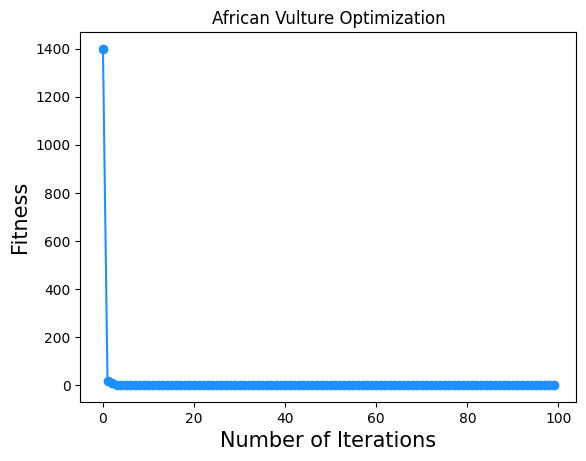

In [44]:
fig, ax = plt.subplots()
ax.plot( Curve,color='dodgerblue', marker='o', markeredgecolor='dodgerblue', markerfacecolor='dodgerblue')
ax.set_xlabel('Number of Iterations',fontsize=15)
ax.set_ylabel('Fitness',fontsize=15)
ax.set_title('African Vulture Optimization')
plt.savefig('image.jpg', format='jpg')
plt.show()

In [48]:
def F1test(X):
    output = sum(np.square(X))
    return output

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2000, 2000) and arg 2 with shape (1, 30).

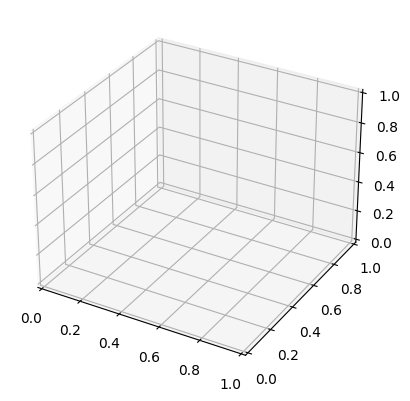

In [52]:
# define range for input
r_min, r_max = -100, 100
# sample input range uniformly at 0.1 increments
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
x, y = np.meshgrid(xaxis, yaxis)
# create a surface plot with the jet color scheme
fig = plt.figure()
axis = fig.add_subplot(projection='3d')
axis.plot_surface(x, y, GbestPositon, cmap='jet')
# show the plot
plt.show()